In [60]:
from IPython.display import Image
from matplotlib import pyplot as plt
% matplotlib inline

# Introduction to Machine Learning 

### What is machine learning? 

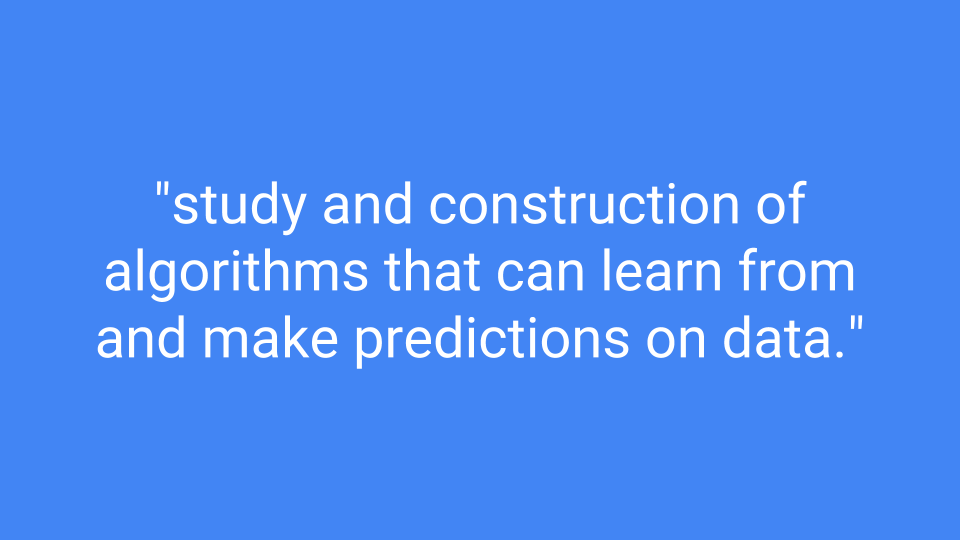

In [61]:
Image(filename='slides/what_is.png') 

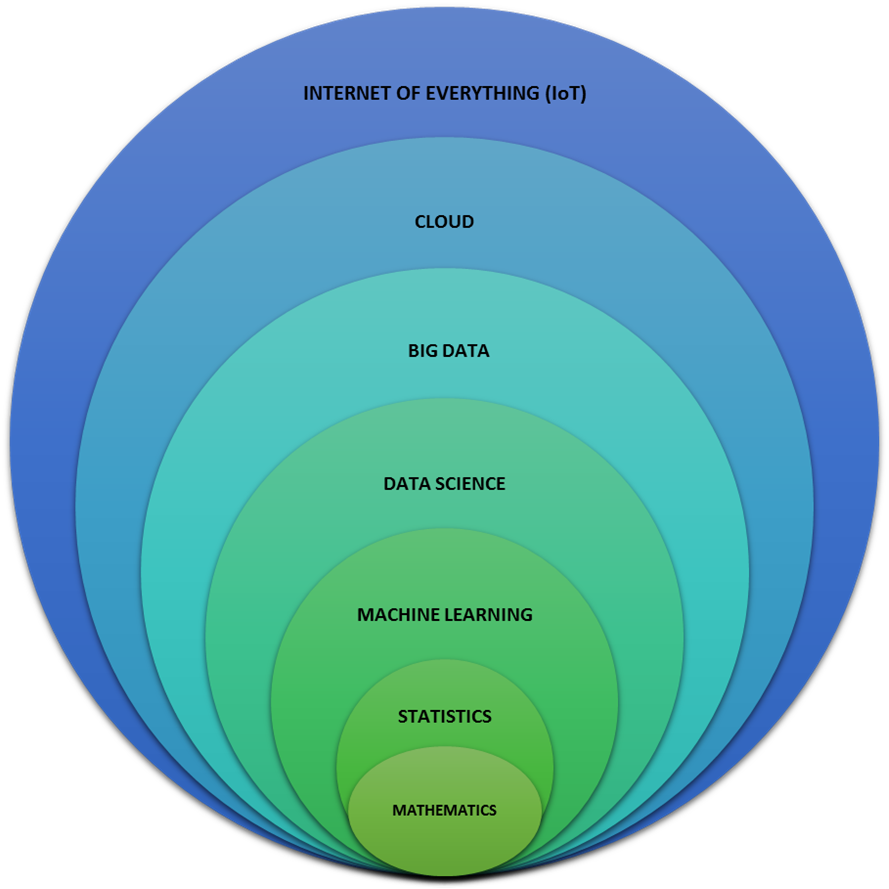

In [62]:
Image(filename='slides/df6e1227-49e5-4086-a87a-dbe04bb36c45-original.png') 

### What can we expect to learn by the end of this class? 

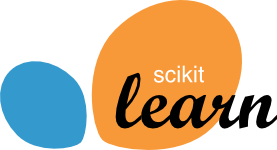

In [63]:
Image(filename='slides/scikit-learn-logo-notext.png')

To learn the basics of the magnificant [Scikit Learn library](http://scikit-learn.org/) for machine learning in Python

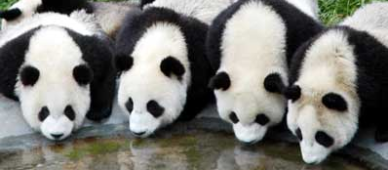

In [64]:
Image(filename='slides/pandas-drinking-cr.png') 

And the basics of the no less spectacular [Pandas](http://pandas.pydata.org/) library for data manipulation. 

More specifically: 

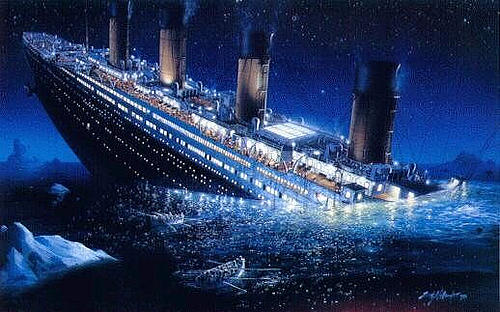

In [65]:
Image(filename='slides/titanic.jpeg')

We will be looking into the [Titanic Dataset](https://www.kaggle.com/c/titanic) from [Kaggle](https://www.kaggle.com/). It is quite small (so does not require anything very fancy), but is excellent for understanding the basics. 

What you learn with this dataset extends very naturally to new datasets. 

# Quick note before we start:

If you want to run these commands and mess around with them, you can!  
* Step 1: [install Anaconda](https://www.continuum.io/downloads) (make yourself a cup of tea, it takes a while to install) 
* Step 2: clone the repository from GitHub. 

# Step 1: let's look at our data: 

Import Pandas: 

In [66]:
import pandas as pd 

[Read the data from the CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).  
Pandas can [read from a number of formats](http://pandas.pydata.org/pandas-docs/stable/io.html), but let's stick to something simple for now. 

In [67]:
titanic = pd.read_csv('titanic_data/train.csv');

Getting a preview, using the [head](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function: 

In [68]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


How many "rows" and "columns"? 

In [69]:
titanic.shape

(891, 12)

Some variables contain no useful information. Let's get rid of them: 

In [70]:
titanic.drop('Name', inplace = True, axis = 1)

Preview again:

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35,1,0,113803,53.1000,C123,S
4,5,0,3,male,35,0,0,373450,8.0500,NaN,S


How many survived? 

In [72]:
titanic.Survived.value_counts()

0    549
1    342
dtype: int64

Not pretty. How old were these people?

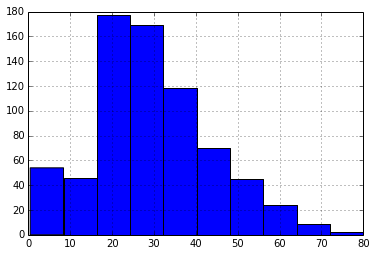

In [73]:
titanic.Age.hist()

Were these people gentlemen?

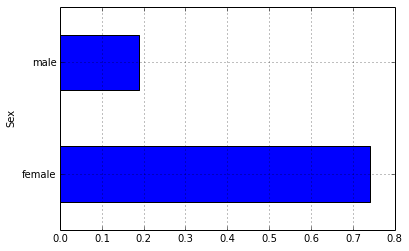

In [74]:
titanic.groupby('Sex').Survived.mean().plot(kind = 'barh')

Let's look at something more complicated. How were the ages, by social class? 

[]

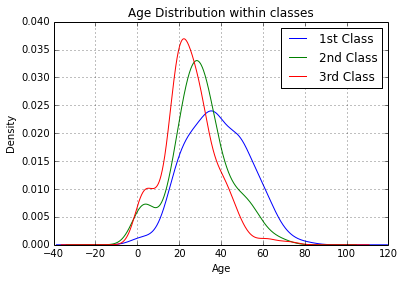

In [75]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
plt.plot()

Do we have data quality problems? 

In [76]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have tons of data problems in Cabin. Maybe we don't care about cabins after all: 

In [77]:
titanic.drop('Cabin', inplace = True, axis = 1)

But we do care about ages... 

In [78]:
titanic[titanic.Age.isnull()].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,NaN,0,0,330877,8.4583,Q
17,18,1,2,male,NaN,0,0,244373,13.0000,S
19,20,1,3,female,NaN,0,0,2649,7.2250,C
26,27,0,3,male,NaN,0,0,2631,7.2250,C
28,29,1,3,female,NaN,0,0,330959,7.8792,Q


In [79]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

For simplicity, let's say that everyone who has no age is the mean age

In [80]:
mean_age = titanic.Age.mean()
print mean_age

29.6991176471


In [81]:
titanic.Age.fillna(mean_age, inplace = True)

Any other problems? 

In [82]:
titanic.shape

(891, 10)

In [83]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [84]:
titanic.dropna(inplace = True)

In [85]:
titanic.shape

(889, 10)

Let's look at our data again: 

In [86]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38,1,0,PC 17599,71.2833,C
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35,1,0,113803,53.1000,S
4,5,0,3,male,35,0,0,373450,8.0500,S


Are we ready? 

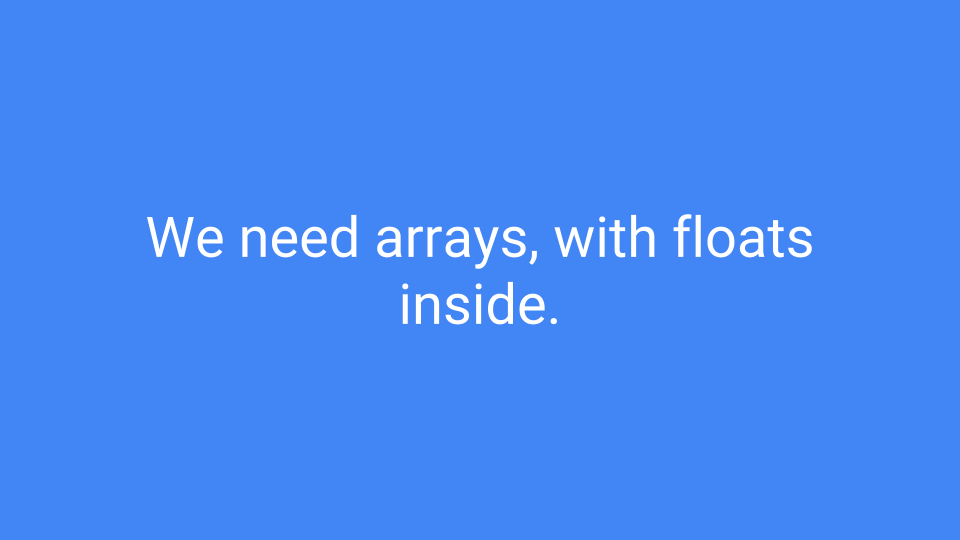

In [87]:
Image(filename='slides/arrays.png') 

In [88]:
titanic.Sex.values[0:10]

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female'], dtype=object)

In [89]:
pd.Categorical.from_array(titanic.Sex).codes[0:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int8)

Let it be so! 

In [90]:
titanic.Sex = pd.Categorical.from_array(titanic.Sex).codes

In [91]:
titanic.Ticket = pd.Categorical.from_array(titanic.Ticket).codes
titanic.Embarked = pd.Categorical.from_array(titanic.Embarked).codes

In [92]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22,1,0,522,7.2500,2
1,2,1,1,0,38,1,0,595,71.2833,0
2,3,1,3,0,26,0,0,668,7.9250,2
3,4,1,1,0,35,1,0,48,53.1000,2
4,5,0,3,1,35,0,0,471,8.0500,2


So now we get to... 

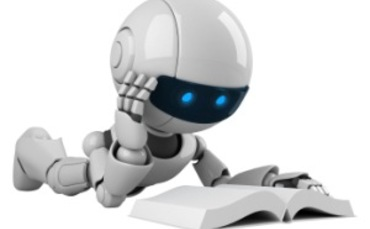

In [93]:
Image(filename='slides/machine_learning.jpg') 

# Part 2: Machine Learning

What is the most basic "machine learning" algorithm we all know and love? 

In [94]:
from sklearn import linear_model

In [95]:
regr = linear_model.LinearRegression()

In [96]:
titanic[['Pclass', 'Age', 'Survived']].head()

,Pclass,Age,Survived
0,3,22,0
1,1,38,1
2,3,26,1
3,1,35,1
4,3,35,0


In [97]:
regr.fit(titanic[['Pclass', 'Age']], titanic.Survived)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
predictions = regr.predict(titanic[['Pclass', 'Age']]);

In [99]:
predictions[0:10]

array([ 0.2800585 ,  0.62592453,  0.24901514,  0.64920705,  0.17916759,
        0.22030688,  0.5017511 ,  0.43527529,  0.2412543 ,  0.57716495])

In [100]:
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

In [101]:
predictions[0:10]

array([ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.])

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(titanic.Survived, predictions)

0.70078740157480313

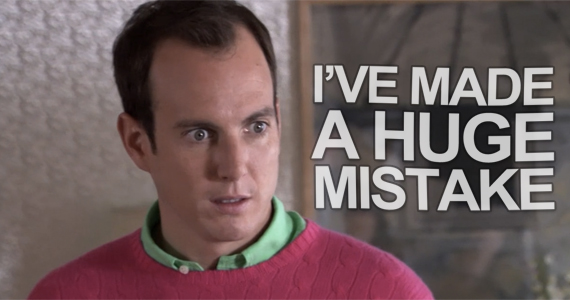

In [104]:
Image(filename='slides/gob-bluth.jpg') 

# Part 3: Validation

Always train on one part of the dataset, and test on another, or your metrics will be extremely over-confident!

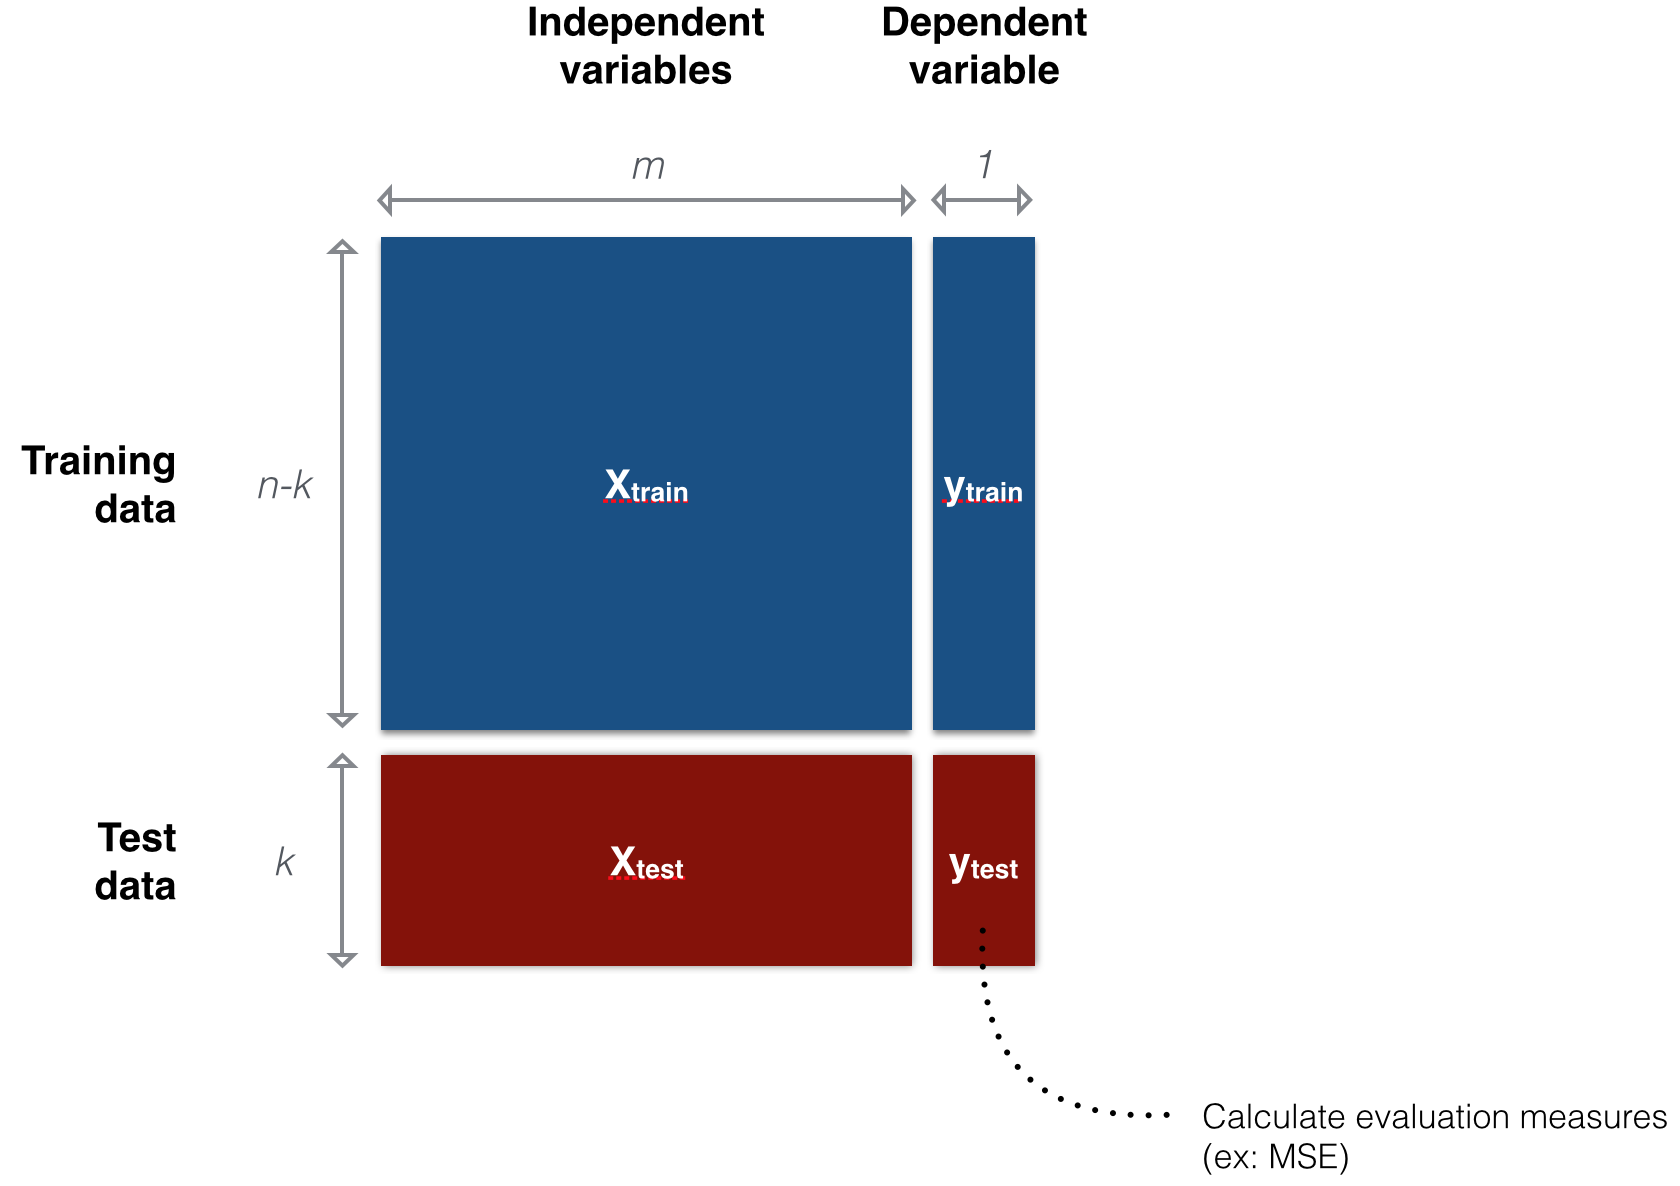

In [105]:
Image(filename='slides/partition.png')

So, how much data did we have again? 

In [106]:
titanic.shape

(889, 10)

Ok, let's make our first 700 rows our training set, and the rest the test set. 

Note: there are [better ways to do this](http://scikit-learn.org/stable/modules/cross_validation.html), we're just using this one because it is easy. 

In [107]:
train = titanic.iloc[0:700]
test = titanic.iloc[701:889]

So remind me, what were our columns? 

In [142]:
X_columns = sorted(titanic.columns)
X_columns

['Age',
 'Embarked',
 'Fare',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket']

We want this to be the features matrix (see image above), so let's get rid of the target column: 

In [109]:
X_columns.remove('Survived')

The X_train will be the X columns of the training set, and y_train will be the target column of the training set:

In [111]:
X_train = train[X_columns]
y_train = train['Survived']

Same logic for the test set: 

In [112]:
X_test = test[X_columns]
y_test = test['Survived']

Excellent! Time to fit some classifiers! 

In [143]:
X_train.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22,2,7.2500,0,1,3,1,1,522
1,38,0,71.2833,0,2,1,0,1,595
2,26,2,7.9250,0,3,3,0,0,668
3,35,2,53.1000,0,4,1,0,1,48
4,35,2,8.0500,0,5,3,1,0,471


Lets start by an extremely simple task: let's fit a linear regression to a couple of our features, Pclass and Age: 

In [113]:
regr.fit(X_train[['Pclass', 'Age']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
predictions = regr.predict(X_test[['Pclass', 'Age']]);
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
accuracy_score(y_test, predictions)

0.72340425531914898

More data!

In [115]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
predictions = regr.predict(X_test);
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
accuracy_score(y_test, predictions)

0.81914893617021278

In [117]:
zip(X_test.columns, regr.coef_)

[('Age', -0.0053184296984177416),
 ('Embarked', -0.032616936079941525),
 ('Fare', 0.00016693950823957874),
 ('Parch', -0.030059842595405895),
 ('PassengerId', 5.4257866023846079e-05),
 ('Pclass', -0.15499120931217344),
 ('Sex', -0.51476926072605922),
 ('SibSp', -0.033618306446610374),
 ('Ticket', -0.00010346146853077908)]

Let's try a slightly different algorithm: 

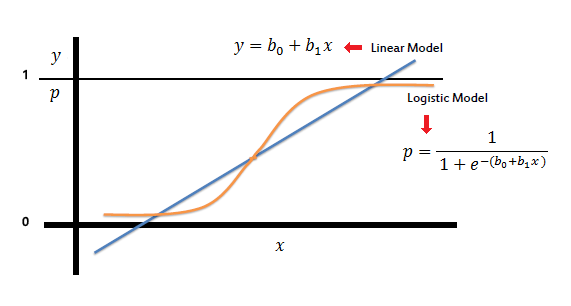

In [118]:
Image(filename='slides/LogReg_1.png')

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
logit = LogisticRegression()

In [121]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [122]:
predictions = logit.predict(X_test);
accuracy_score(y_test, predictions)

0.82446808510638303

Or even something completely different: 

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
kn = KNeighborsClassifier()

In [125]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [126]:
prediction = kn.predict(X_test)

In [127]:
accuracy_score(y_test, prediction)

0.69680851063829785

In [128]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22,1,0,522,7.2500,2
1,2,1,1,0,38,1,0,595,71.2833,0
2,3,1,3,0,26,0,0,668,7.9250,2
3,4,1,1,0,35,1,0,48,53.1000,2
4,5,0,3,1,35,0,0,471,8.0500,2


Advanced algos! 

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf = RandomForestClassifier()

In [131]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
predictions = rf.predict(X_test);
accuracy_score(y_test, predictions)

0.86170212765957444

More control? 

In [133]:
rf = RandomForestClassifier(n_estimators=100, class_weight='auto', max_depth=50, n_jobs=-1)

In [134]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
predictions = rf.predict(X_test);
accuracy_score(y_test, predictions)

0.87234042553191493

#### Algorithms in general: 

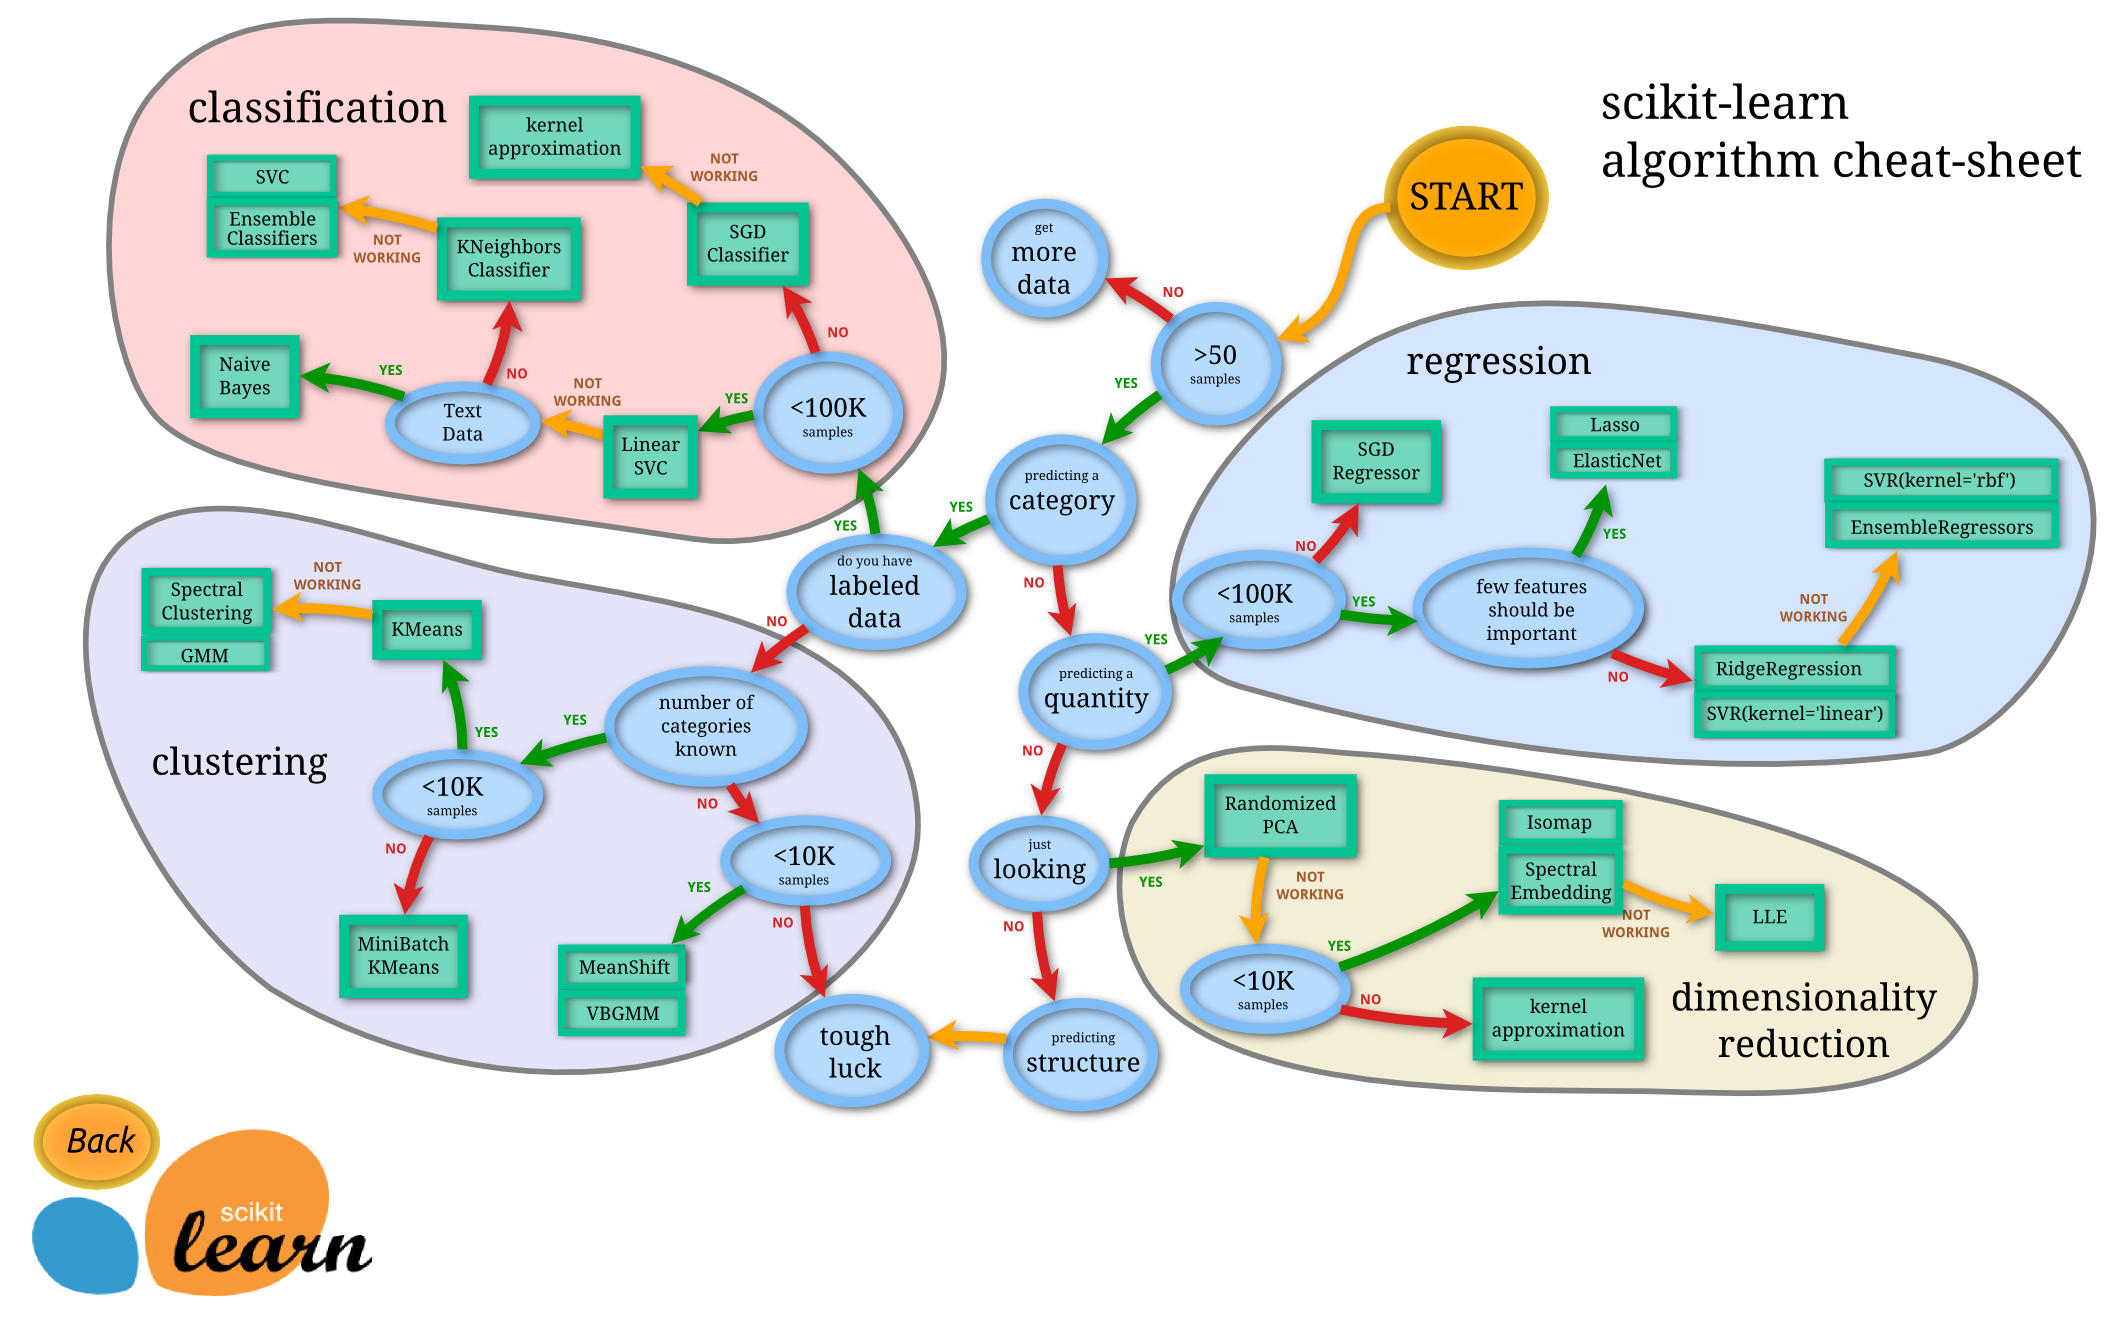

In [136]:
Image(filename='slides/ml_map.png')

#### So... great success? 

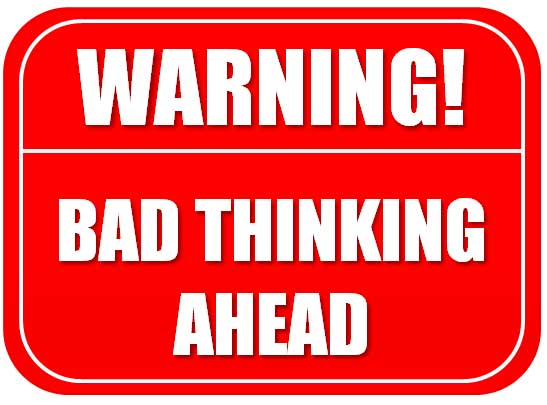

In [137]:
Image(filename='slides/WARNING-Unregulated-Advice.jpg')

# Part 4: Success Metrics

Overfitting

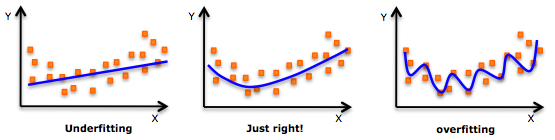

In [138]:
Image(filename='slides/underfitting-overfitting.png')

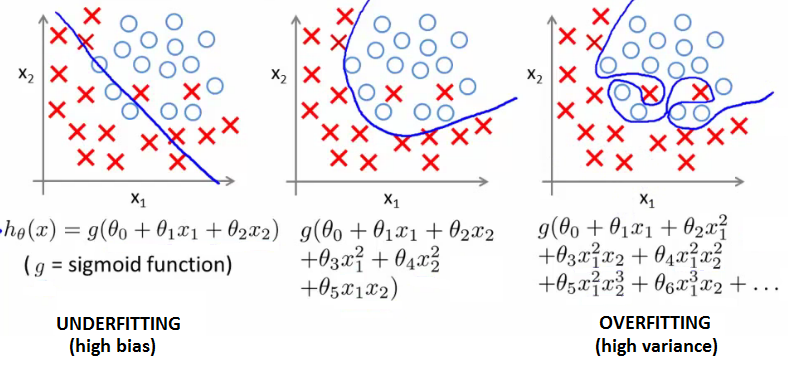

In [139]:
Image(filename='slides/reg.png')

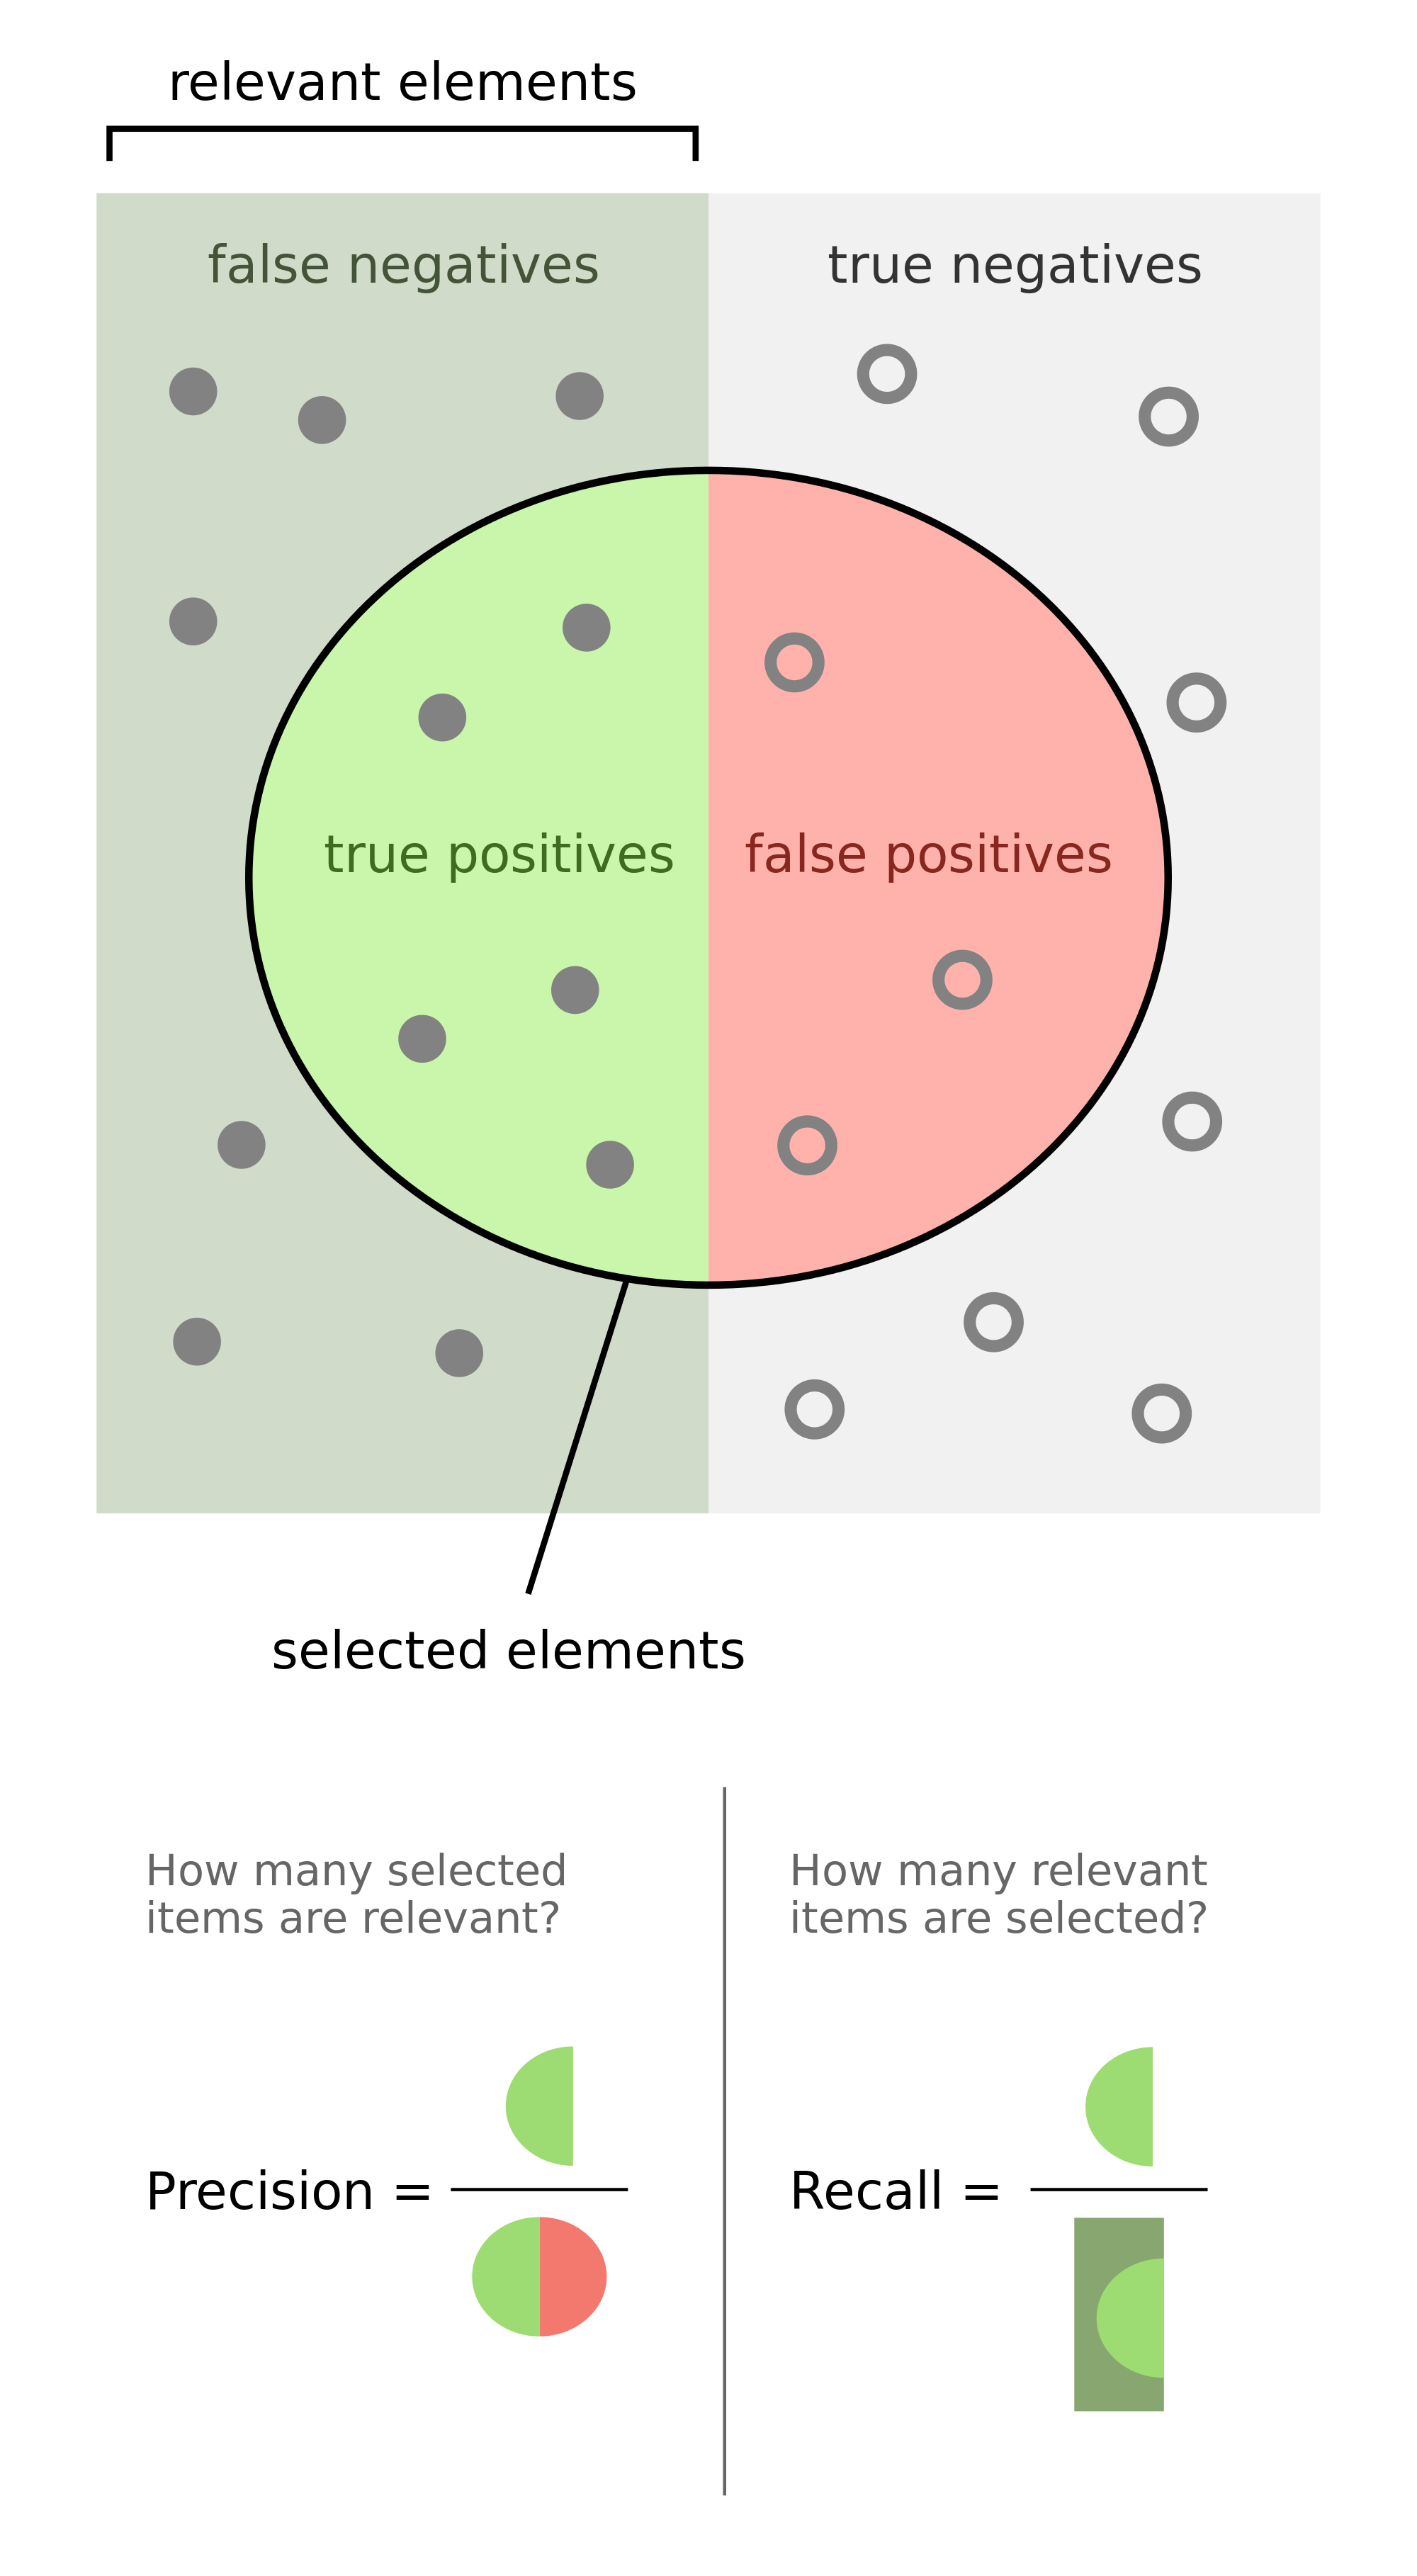

In [140]:
Image(filename='slides/metrics.png')

# Part 5: In summary...  

* Machine Learning (Scikit, Weka, etc) requires data wrangling. 

* There is no BEST algorithm, there are better algorithms for different problems

* Metrics which look too good to be true, are not true. 

* Dispite the intimidating name, most concepts in ML are not complicated, and it is "easy" to start. 

# Part 6: first steps on your own

#### Installing: 

Installing scikit-learn, pandas, ipython notebooks (the one you are looking at!) etc can be slow and boring. The best way to install them it to use Anaconda, by Continuum Analytics, that comes pre-installed with all the necessary packages, and (I think) works on Windows, Macs and Linux machines. 

#### Getting data: 

The best ways to get datasets are to go to Kaggle, or to UCI Machine Learning Repository. 

Google for: Machine Learning Dataset Wine Quality to find a cool Portuguese wines dataset, on which you can apply all that is in this notebook. 

#### Using Ipython Notebooks

When you get profissient with ipython you will probably want to run Python scripts directly, but until then working in Ipython Notebooks such as this is awesome for learning.

To do so (after you've installed Anaconda) just open your terminal and type:  
`ipython notebook`

#### More on Machine Learning: 

Many people who get involved non-professionally in Machine Learning start by Andrew NGs Stanford course on Coursera. It assumes no prior knowledge of the subject, and builds to a substantial knowledge base. 

For Python based Machine Learning in Lisbon, the Open Data Meetup holds regular meetings to learn and try our different algorithms and techniques.